In [1400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1401]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
true_test = pd.read_csv("gender_submission.csv")
true_val = true_test['Survived']

In [1402]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1403]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1404]:
true_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1405]:
true_val

0      0
1      1
2      0
3      0
4      1
5      0
6      1
7      0
8      1
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     0
26     1
27     0
28     0
29     0
      ..
388    0
389    0
390    0
391    1
392    0
393    0
394    0
395    1
396    0
397    1
398    0
399    0
400    1
401    0
402    1
403    0
404    0
405    0
406    0
407    0
408    1
409    1
410    1
411    1
412    1
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [1406]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1407]:
train.shape

(891, 12)

In [1408]:
test.shape

(418, 11)

In [1409]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1410]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1411]:
##combine train and test data for coommon processing , we will separate them later after processing
df = train.append(test, ignore_index = True)

In [1412]:
df.shape

(1309, 12)

In [1413]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [1414]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [1415]:
df.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

# Univariate Analysis - Tabular and Graphical

In [1416]:
df['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [1417]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


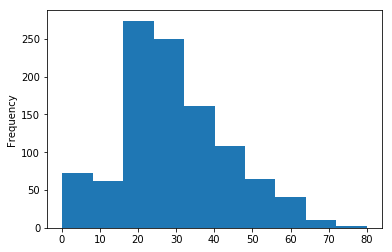

In [1418]:
df['Age'].plot.hist()
plt.show()

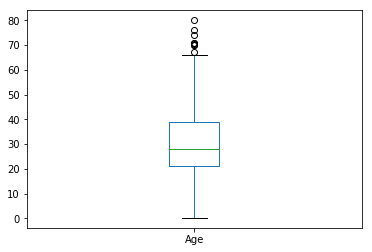

In [1419]:
df['Age'].plot.box()
plt.show()

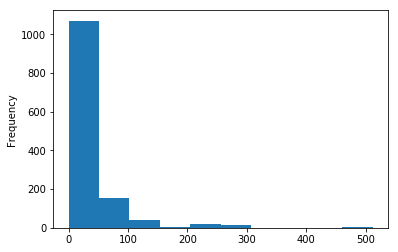

In [1420]:
df['Fare'].plot.hist()
plt.show()

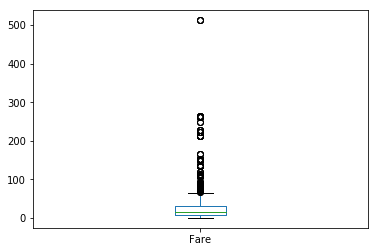

In [1421]:
df['Fare'].plot.box()
plt.show()

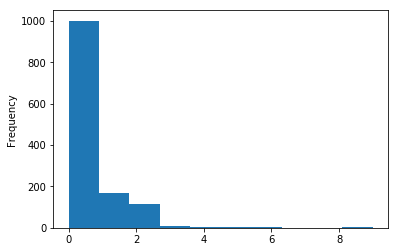

In [1422]:
df['Parch'].plot.hist()
plt.show()

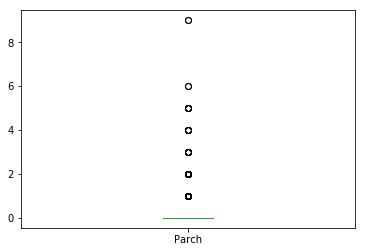

In [1423]:
df['Parch'].plot.box()
plt.show()

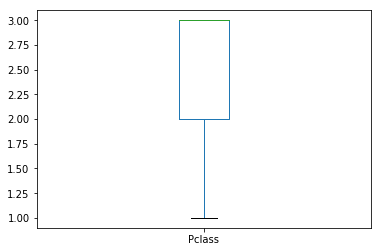

In [1424]:
df['Pclass'].plot.box()
plt.show()

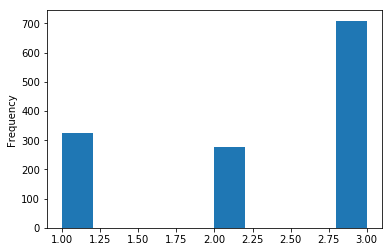

In [1425]:
df['Pclass'].plot.hist()
plt.show()

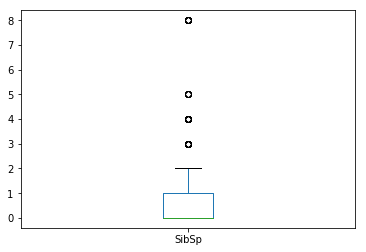

In [1426]:
df['SibSp'].plot.box()
plt.show()

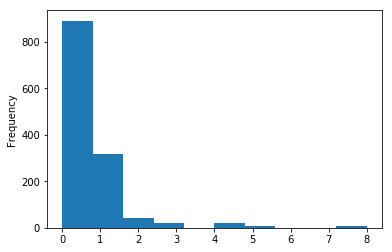

In [1427]:
df['SibSp'].plot.hist()
plt.show()

In [1428]:
# Categorical variables
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

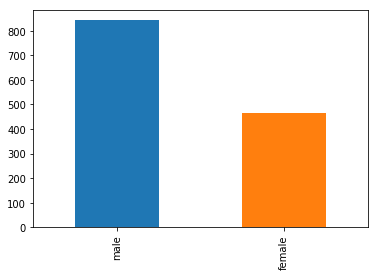

In [1429]:
df['Sex'].value_counts().plot.bar()
plt.show()

In [1430]:
df['Sex'].value_counts()/len(df['Sex'])

male      0.644003
female    0.355997
Name: Sex, dtype: float64

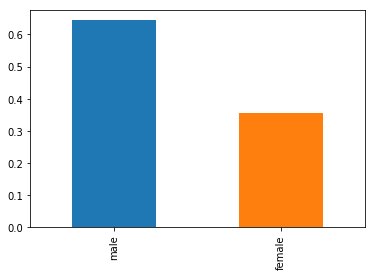

In [1431]:
(df['Sex'].value_counts()/len(df['Sex'])).plot.bar()
plt.show()

In [1432]:
df['Cabin'].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
B96 B98            4
F2                 4
C78                4
C22 C26            4
D                  4
F4                 4
F33                4
B51 B53 B55        3
A34                3
E101               3
E34                3
C101               3
B58 B60            3
C52                2
E24                2
C65                2
B77                2
C89                2
F G73              2
E33                2
E25                2
C62 C64            2
D19                2
D15                2
C116               2
C32                2
B78                2
                  ..
E68                1
E10                1
C148               1
F38                1
B42                1
A19                1
B36                1
E63                1
D22                1
B73                1
A11                1
B3                 1
B79                1
A23                1
C118               1
C49                1
C30          

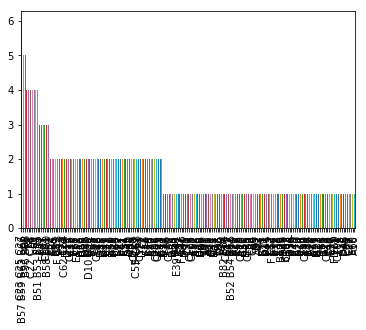

In [1433]:
df['Cabin'].value_counts().plot.bar()
plt.show()

In [1434]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

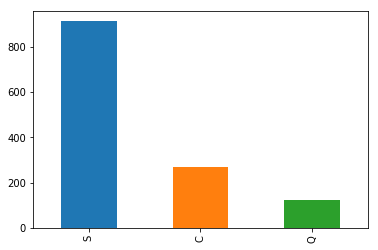

In [1435]:
df['Embarked'].value_counts().plot.bar()
plt.show()

In [1436]:
df['Name'].value_counts()

Kelly, Mr. James                                           2
Connolly, Miss. Kate                                       2
McNeill, Miss. Bridget                                     1
Van Impe, Mrs. Jean Baptiste (Rosalie Paula Govaert)       1
de Messemaeker, Mr. Guillaume Joseph                       1
Hays, Mr. Charles Melville                                 1
Harris, Mr. Henry Birkhardt                                1
Hakkarainen, Mr. Pekka Pietari                             1
Jonkoff, Mr. Lalio                                         1
Daly, Miss. Margaret Marcella Maggie""                     1
Lennon, Mr. Denis                                          1
Funk, Miss. Annie Clemmer                                  1
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)    1
Goldsmith, Mr. Frank John                                  1
Saad, Mr. Amin                                             1
Drew, Mrs. James Vivian (Lulu Thorne Christian)            1
Birkeland, Mr. Hans Mart

In [1437]:
df['Ticket'].value_counts()

CA. 2343              11
CA 2144                8
1601                   8
3101295                7
S.O.C. 14879           7
347077                 7
347082                 7
PC 17608               7
382652                 6
113781                 6
19950                  6
347088                 6
W./C. 6608             5
16966                  5
PC 17757               5
220845                 5
349909                 5
113503                 5
4133                   5
C.A. 2315              4
24160                  4
PC 17483               4
PC 17755               4
SC/Paris 2123          4
LINE                   4
PC 17760               4
C.A. 33112             4
113760                 4
230136                 4
17421                  4
                      ..
347065                 1
367655                 1
Fa 265302              1
SC/PARIS 2168          1
382651                 1
330968                 1
113801                 1
371109                 1
220844                 1


# Bivariate Analysis

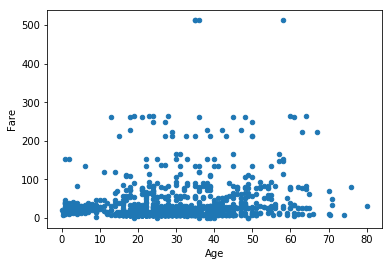

In [1438]:
# continous - continous 
# graphical
df.plot.scatter('Age','Fare')
plt.show()

In [1439]:
df['Age'].corr(df['Fare'])

0.17873985599964118

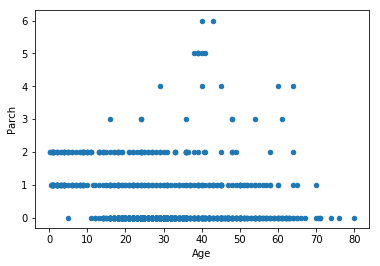

In [1440]:
df.plot.scatter('Age','Parch')
plt.show()

In [1441]:
df['Age'].corr(df['Parch'])

-0.1509170903635447

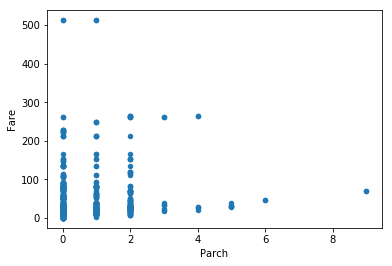

In [1442]:
df.plot.scatter('Parch','Fare')
plt.show()

In [1443]:
df['Parch'].corr(df['Fare'])

0.22153865854819085

In [1444]:
df.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,-0.150917,0.028814,-0.408106,-0.243699,-0.077221
Fare,0.178740,1.000000,0.221539,0.031428,-0.558629,0.160238,0.257307
Parch,-0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.028814,0.031428,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.408106,-0.558629,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


In [1445]:
# categorical - continous 
# graphical

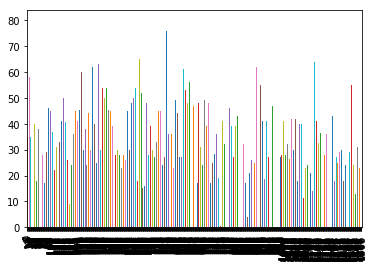

In [1446]:
df.groupby('Sex')['Age'].plot.bar()
plt.show()

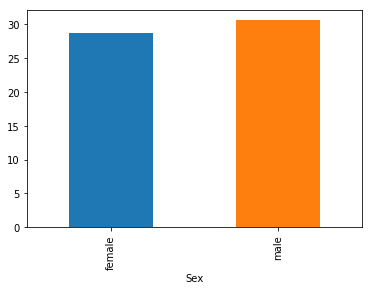

In [1447]:
df.groupby('Sex')['Age'].mean().plot.bar()
plt.show()

In [1448]:
male = df[df['Sex'] == 'male']
female = df[df['Sex'] == 'female']

In [1449]:
male.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909


In [1450]:
from scipy.stats import ttest_ind
t_stats,p_value = ttest_ind(male['Age'],female['Age'],nan_policy = 'omit')
t_stats,p_value

(2.0606086633671379, 0.039587700076719558)

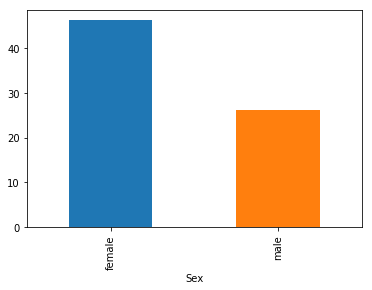

In [1451]:
df.groupby('Sex')['Fare'].mean().plot.bar()
plt.show()

In [1452]:
from scipy.stats import ttest_ind
t_stats,p_value = ttest_ind(male['Fare'],female['Fare'],nan_policy = 'omit')
t_stats,p_value

(-6.8229925242076144, 1.3605668336088996e-11)

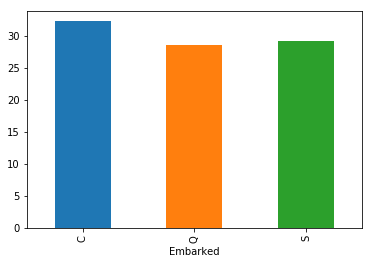

In [1453]:
df.groupby('Embarked')['Age'].mean().plot.bar()
plt.show()

In [1454]:
C = df[df['Embarked']=='C']
Q = df[df['Embarked']=='Q']
S = df[df['Embarked']=='S']

In [1455]:
C.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736
19,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1.0,2649
26,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,0.0,2631
30,40.0,NaN,C,27.7208,"Uruchurtu, Don. Manuel E",0,31,1,male,0,0.0,PC 17601


In [1456]:
from scipy.stats import ttest_ind
t_stats,p_val = ttest_ind(C['Age'],S['Age'],nan_policy='omit')
t_stats,p_val

(2.785234149499785, 0.005450774713801225)

In [1457]:
from scipy.stats import ttest_ind
t_stats,p_val = ttest_ind(C['Age'],Q['Age'],nan_policy='omit')
t_stats,p_val

(1.547363269457958, 0.12299198098108131)

In [1458]:
from scipy.stats import ttest_ind
t_stats,p_val = ttest_ind(S['Age'],Q['Age'],nan_policy='omit')
t_stats,p_val

(0.2989292600191138, 0.7650688495417024)

In [1459]:
#categorical- categorical

from scipy.stats import chi2_contingency

pd.crosstab(df['Sex'],df['Embarked'])

Embarked,C,Q,S
Sex,,,
female,113,60,291
male,157,63,623


In [1460]:
chi2_contingency(pd.crosstab(df['Sex'],df['Embarked']))

(19.584196633227737,
 5.5891496087388715e-05,
 2,
 array([[  95.8530987 ,   43.66641163,  324.48048967],
        [ 174.1469013 ,   79.33358837,  589.51951033]]))

In [1461]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0.0,1.0
Sex,,
female,81,233
male,468,109


In [1462]:
chi2_contingency(pd.crosstab(df['Sex'],df['Survived']))

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[ 193.47474747,  120.52525253],
        [ 355.52525253,  221.47474747]]))

# Missing Value Treatment

In [1463]:
# continous variable and Categorcial

In [1464]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [1465]:
df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [1466]:
# cabin missing so many values  and not contributing towards results to can be removed

In [1467]:
df.drop(['Cabin'],axis = 1)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [1468]:
df.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [1469]:
df = df.drop(['Cabin'],axis = 1)

In [1470]:
df.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [1471]:
df.shape

(1309, 11)

In [1472]:
# replace missing age with its median value
df['Age'].fillna(df['Age'].median(),inplace = True)

In [1473]:
# replace missing fare with its median value
df['Fare'].fillna(df['Fare'].median(),inplace = True)

In [1474]:
#replace missing embarked with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace =True)

In [1475]:
df[df['Embarked'].isnull()]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [1476]:
df.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

# Before moving to outlier treatment, remove unnecessary columns from dataset and then separate train and test data

In [1477]:
df.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [1478]:
df = df.drop(['Name','PassengerId'],axis=1)

In [1479]:
df.columns

Index(['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Ticket'],
      dtype='object')

In [1480]:
df.drop(['Ticket'],axis=1,inplace=True)

In [1481]:
df.columns

Index(['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived'],
      dtype='object')

In [1482]:
df.dtypes

Age         float64
Embarked     object
Fare        float64
Parch         int64
Pclass        int64
Sex          object
SibSp         int64
Survived    float64
dtype: object

# Label Encoding

In [1483]:
#Now let's convert the categorical varialbles to numerical variables. 

In [1484]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['Embarked_num'] = label.fit_transform(df['Embarked'])
df['Sex_num'] = label.fit_transform(df['Sex'])

In [1485]:
df.columns

Index(['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Embarked_num', 'Sex_num'],
      dtype='object')

In [1486]:
df.drop(['Embarked','Sex'],axis=1,inplace=True)

In [1487]:
df.columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived', 'Embarked_num',
       'Sex_num'],
      dtype='object')

In [1488]:
df.dtypes

Age             float64
Fare            float64
Parch             int64
Pclass            int64
SibSp             int64
Survived        float64
Embarked_num      int64
Sex_num           int64
dtype: object

In [1489]:
df.shape

(1309, 8)

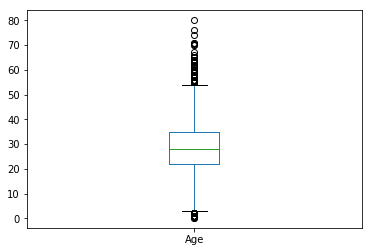

In [1490]:
df['Age'].plot.box()
plt.show()

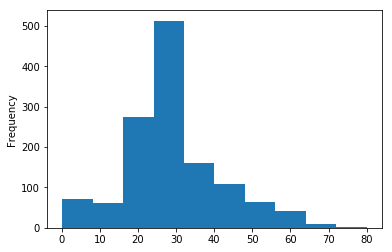

In [1491]:
df['Age'].plot.hist()
plt.show()

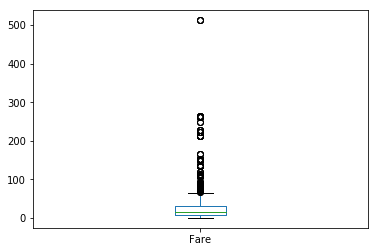

In [1492]:
df['Fare'].plot.box()
plt.show()

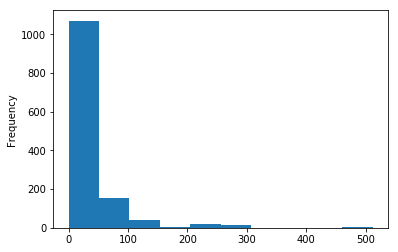

In [1493]:
df['Fare'].plot.hist()
plt.show()

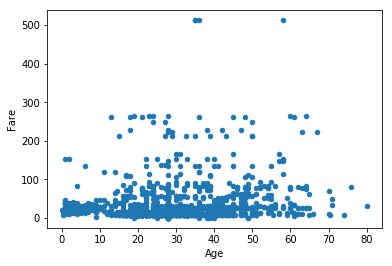

In [1494]:
df.plot.scatter('Age','Fare')
plt.show()

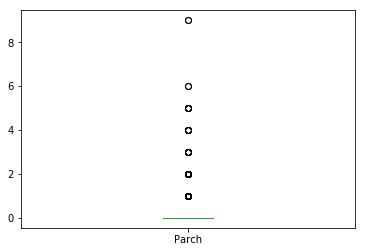

In [1495]:
df['Parch'].plot.box()
plt.show()

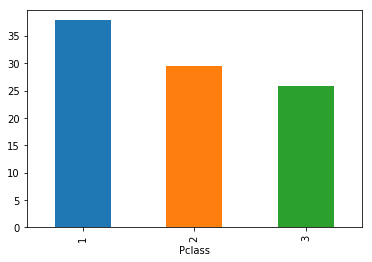

In [1496]:
df.groupby('Pclass')['Age'].mean().plot.bar()
plt.show()

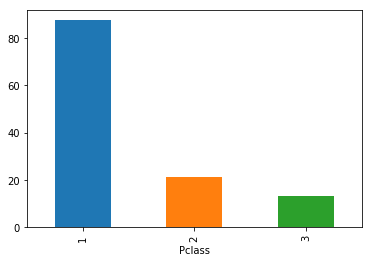

In [1497]:
df.groupby('Pclass')['Fare'].mean().plot.bar()
plt.show()

# splitting of train and test from combined df before outlier treatment

In [1498]:
df.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,Embarked_num,Sex_num
0,22.0,7.2500,0,3,1,0.0,2,1
1,38.0,71.2833,0,1,1,1.0,0,0
2,26.0,7.9250,0,3,0,1.0,2,0
3,35.0,53.1000,0,1,1,1.0,2,0
4,35.0,8.0500,0,3,0,0.0,2,1


In [1499]:
df.tail()

,Age,Fare,Parch,Pclass,SibSp,Survived,Embarked_num,Sex_num
1304,28.0,8.0500,0,3,0,NaN,2,1
1305,39.0,108.9000,0,1,0,NaN,0,0
1306,38.5,7.2500,0,3,0,NaN,2,1
1307,28.0,8.0500,0,3,0,NaN,2,1
1308,28.0,22.3583,1,3,1,NaN,0,1


In [1500]:
## No feature engineering using now

In [1501]:
len(train)

891

In [1502]:
train = df[:len(train)]
test = df[len(train):]


In [1503]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [1504]:
train.shape


(891, 8)

In [1505]:
test.shape

(418, 8)

In [1506]:
test.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,Embarked_num,Sex_num
891,34.5,7.8292,0,3,0,NaN,1,1
892,47.0,7.0000,0,3,1,NaN,2,0
893,62.0,9.6875,0,2,0,NaN,1,1
894,27.0,8.6625,0,3,0,NaN,2,1
895,22.0,12.2875,1,3,1,NaN,2,0


In [1507]:
test.isnull().sum()

Age               0
Fare              0
Parch             0
Pclass            0
SibSp             0
Survived        418
Embarked_num      0
Sex_num           0
dtype: int64

In [1508]:
#true_val = test['Survived']
test.drop(['Survived'],axis=1,inplace=True)

C:\Users\Nwh\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [1509]:
test.shape

(418, 7)

In [1510]:
test.columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Embarked_num', 'Sex_num'], dtype='object')

In [1511]:
true_val

0      0
1      1
2      0
3      0
4      1
5      0
6      1
7      0
8      1
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     0
26     1
27     0
28     0
29     0
      ..
388    0
389    0
390    0
391    1
392    0
393    0
394    0
395    1
396    0
397    1
398    0
399    0
400    1
401    0
402    1
403    0
404    0
405    0
406    0
407    0
408    1
409    1
410    1
411    1
412    1
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# Outlier Treatment

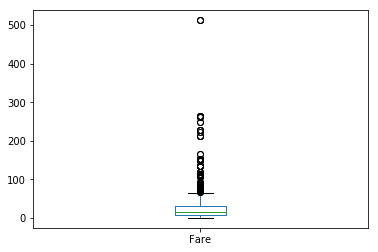

In [1512]:
train['Fare'].plot.box()
plt.show()

In [1513]:
# fare above 400 is extreme outlier should be removed
train = train[train['Fare'] < 400]

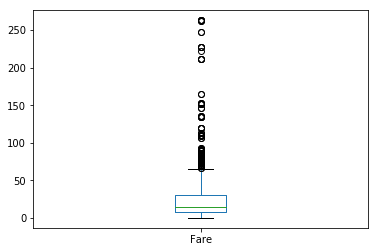

In [1514]:
train['Fare'].plot.box()
plt.show()

In [1515]:
train['Fare'].describe()

count    888.000000
mean      30.582164
std       41.176366
min        0.000000
25%        7.895800
50%       14.454200
75%       30.771850
max      263.000000
Name: Fare, dtype: float64

In [1516]:
# fare above 62 also outliers but we should not remove as large no cause loss of data, so we will replace with mean
##earlier replace with median for missing values

train.loc[train['Fare'] > 62, 'Fare'] = np.mean(train['Fare'])


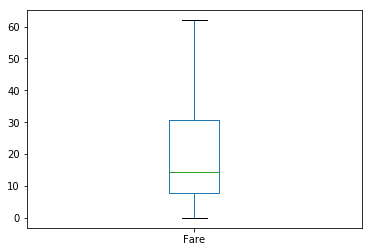

In [1517]:
train['Fare'].plot.box()
plt.show()

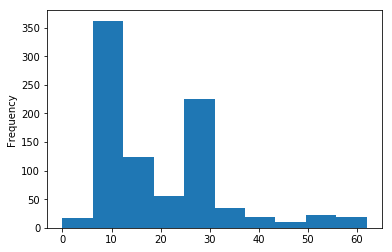

In [1518]:
train['Fare'].plot.hist()
plt.show()

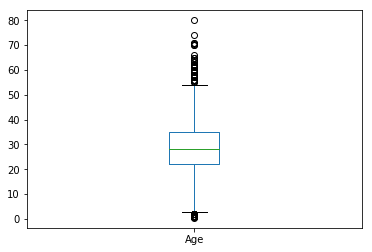

In [1519]:
# Now for age , we already used median for missing values, so now using mean
train['Age'].plot.box()
plt.show()

In [1520]:
train.loc[train['Age'] > 55 , 'Age'] = np.mean(train['Age'])

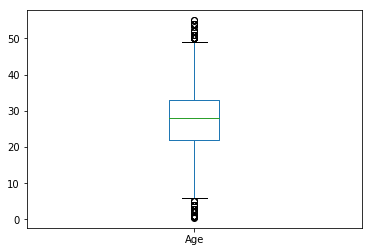

In [1521]:
train['Age'].plot.box()
plt.show()

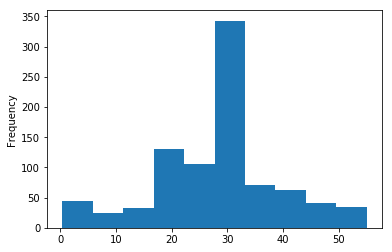

In [1522]:
train['Age'].plot.hist()
plt.show()

In [1523]:
# even some samples outside man and max of box plot, but hist shows normal distribution, we will stop there treatment

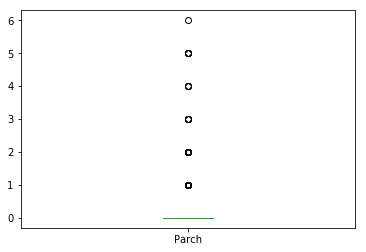

In [1524]:
train['Parch'].plot.box()
plt.show()

In [1525]:
# not doing anything for parch

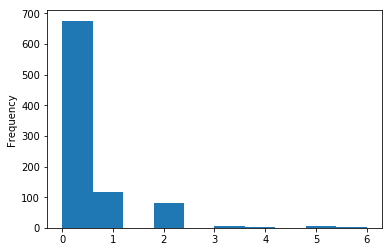

In [1526]:
train['Parch'].plot.hist()
plt.show()

# No feature engg required of doing

# Modeling

In [1256]:
train.loc[[679]]

KeyError: 'None of [[679]] are in the [index]'

In [1527]:
### we have removed so many rows, so datframe should be reindexed according to length of rows, to avoid inclusion 
# of Nan value row for removed row index..So this step is very very important before start modeling
train.index = range(len(train))

In [1528]:
train.loc[[679]]

,Age,Fare,Parch,Pclass,SibSp,Survived,Embarked_num,Sex_num
679,27.0,30.582164,0,1,0,1.0,0,1


In [1529]:
x_train = train.drop(['Survived'],axis=1)
y_train = train['Survived']

In [1530]:
test.head()

,Age,Fare,Parch,Pclass,SibSp,Embarked_num,Sex_num
891,34.5,7.8292,0,3,0,1,1
892,47.0,7.0000,0,3,1,2,0
893,62.0,9.6875,0,2,0,1,1
894,27.0,8.6625,0,3,0,2,1
895,22.0,12.2875,1,3,1,2,0


In [1531]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
#y_pred = classifier.predict(test)

#true_test['Survived']= y_pred
#submission['Loan_Status'].replace(0, 'N',inplace=True)
#submission['Loan_Status'].replace(1, 'Y',inplace=True)
#pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')

In [1532]:
test.head()

,Age,Fare,Parch,Pclass,SibSp,Embarked_num,Sex_num
891,34.5,7.8292,0,3,0,1,1
892,47.0,7.0000,0,3,1,2,0
893,62.0,9.6875,0,2,0,1,1
894,27.0,8.6625,0,3,0,2,1
895,22.0,12.2875,1,3,1,2,0


In [1533]:
true_val.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [1534]:
classifier.score(test,true_val)


0.90191387559808611

In [1535]:
from sklearn.metrics import accuracy_score
accuracy_score(true_val,classifier.predict(test))

0.90191387559808611

In [1287]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [1536]:
y_pred = classifier.predict(test)

In [1537]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(true_val,classifier.predict(test))
cf

array([[233,  33],
       [  8, 144]], dtype=int64)

In [ ]:
test.columns

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [1538]:
y_pred

array([ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0

In [ ]:
true_test['Survived']= y_pred.astype(int)
pd.DataFrame(true_test,columns= ['PassengerId','Survived']).to_csv('titanic_ava_results_new.csv',index=False)

# Lets check stratifiedKfold and different classifiers for final model choose


In [1539]:
X = x_train
y = y_train
X_test = test

In [1540]:
X_test.columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Embarked_num', 'Sex_num'], dtype='object')

In [1541]:
X_test.isnull().sum()

Age             0
Fare            0
Parch           0
Pclass          0
SibSp           0
Embarked_num    0
Sex_num         0
dtype: int64

In [1542]:
X_test.index = range(len(X_test))


In [ ]:
X_test

In [ ]:
X.isnull().sum()

In [ ]:
y = y.astype(int)

In [ ]:
X_test

In [1269]:
from sklearn.model_selection import train_test_split

X_train,x_cv, y_train, y_cv = train_test_split(X,y, test_size= 0.3)


In [ ]:
np.isnan(x_cv).any()

In [1270]:
from sklearn.model_selection import StratifiedKFold
i = 1
kf = StratifiedKFold(n_splits=5,random_state=0,shuffle=True)

In [1271]:
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xcv = X.loc[train_index], X.loc[test_index]
    ytr,ycv = y[train_index], y[test_index]    
       
    classifier = LogisticRegression()

    classifier.fit(xtr,ytr)
    
    pred_test = classifier.predict(xcv)
    score = accuracy_score(ycv,pred_test)
    print('accuracy_score',score)
    i+=1
    


 1 of kfold 5
accuracy_score 0.747191011236

 2 of kfold 5
accuracy_score 0.786516853933

 3 of kfold 5
accuracy_score 0.848314606742

 4 of kfold 5
accuracy_score 0.808988764045

 5 of kfold 5
accuracy_score 0.767045454545


In [ ]:
##avg score of 78% on unseen cross validation data..same results possible for test data

# decision tree

In [1272]:
from sklearn import tree
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold '.format(i,kf.n_splits))
    xtr,xcv = X.loc[train_index],X.loc[test_index]
    ytr,ycv = y[train_index],y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xcv)
    
    score = accuracy_score(ycv,pred_test)
    print('accuracy score',score)
    i+=1
    

    


 1 of kfold 
accuracy score 0.808988764045

 2 of kfold 
accuracy score 0.825842696629

 3 of kfold 
accuracy score 0.780898876404

 4 of kfold 
accuracy score 0.752808988764

 5 of kfold 
accuracy score 0.761363636364


In [ ]:
##avg score of 77% on unseen cross validation data..same results possible for test data..Logistic better than DecisionTree

# Random Forest

In [1273]:
from sklearn.ensemble import RandomForestClassifier

i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} kfold of {}'.format(i,kf.n_splits))
    xtr,xcv = X.loc[train_index], X.loc[test_index]
    ytr,ycv = y[train_index], y[test_index]
    
    model = RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xcv)
    score = accuracy_score(ycv,pred_test)
    print('accuracy score',score)
    i+=1


 1 kfold of 5
accuracy score 0.825842696629

 2 kfold of 5
accuracy score 0.814606741573

 3 kfold of 5
accuracy score 0.803370786517

 4 kfold of 5
accuracy score 0.786516853933

 5 kfold of 5
accuracy score 0.835227272727


In [ ]:
##avg score of 80% on unseen cross validation data..same results possible for test data..This is better than
#Logistic better and DecisionTree
## lets see can we improve RandomForest with GridSearch technique

In [1274]:
from sklearn.model_selection import GridSearchCV

paramgrid = { 'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
gridsearch = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split

X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3,random_state=1)

gridsearch.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1275]:
gridsearch.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [1276]:
from sklearn.ensemble import RandomForestClassifier

i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} kfold of {}'.format(i,kf.n_splits))
    xtr,xcv = X.loc[train_index], X.loc[test_index]
    ytr,ycv = y[train_index], y[test_index]
    
    model = RandomForestClassifier(random_state=1,max_depth=5,n_estimators=41)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xcv)
    score = accuracy_score(ycv,pred_test)
    print('accuracy score',score)
    i+=1


 1 kfold of 5
accuracy score 0.808988764045

 2 kfold of 5
accuracy score 0.831460674157

 3 kfold of 5
accuracy score 0.831460674157

 4 kfold of 5
accuracy score 0.803370786517

 5 kfold of 5
accuracy score 0.835227272727


In [ ]:
##avg score of 81.8% on unseen cross validation data..score increased with 1.8%

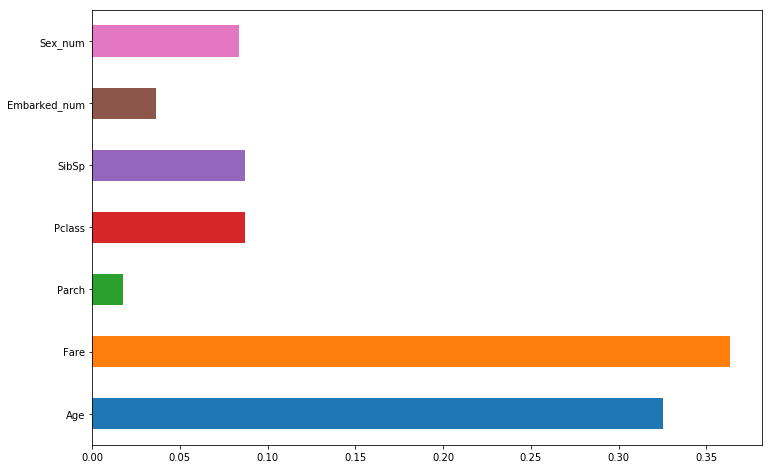

In [1284]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))
plt.show()

# SVM

In [1277]:

from sklearn.svm import SVC
i = 1

kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):
    print('\n {} kfold of {}'.format(i,kf.n_splits))
    xtr,xcv = X.loc[train_index], X.loc[test_index]
    ytr,ycv = y[train_index], y[test_index]
    
    model = SVC(kernel = 'sigmoid',random_state=0)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xcv)
    score = accuracy_score(ycv,pred_test)
    print('accuracy score',score)
    i+=1
    



 1 kfold of 5
accuracy score 0.61797752809

 2 kfold of 5
accuracy score 0.61797752809

 3 kfold of 5
accuracy score 0.61797752809

 4 kfold of 5
accuracy score 0.61797752809

 5 kfold of 5
accuracy score 0.619318181818


In [1123]:
##avg score of 61% on unseen cross validation data..same results possible for test data..This is lowest compared to other classifier.

# XGB Boost

In [1543]:
from xgboost import XGBClassifier

i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} kfold of {}'.format(i,kf.n_splits))
    xtr,xcv = X.loc[train_index], X.loc[test_index]
    ytr,ycv = y[train_index], y[test_index]
    
    model = XGBClassifier(max_depth=4,n_estimators=50)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xcv)
    score = accuracy_score(ycv,pred_test)
    print('accuracy score',score)
    i+=1
    



 1 kfold of 5
accuracy score 0.814606741573

 2 kfold of 5
accuracy score 0.831460674157

 3 kfold of 5
accuracy score 0.820224719101

 4 kfold of 5
accuracy score 0.803370786517

 5 kfold of 5
accuracy score 0.823863636364


In [1544]:
##avg score of 81.6% on unseen cross validation data..less than random forest
# lets try to improve with grid search
from sklearn.model_selection import GridSearchCV

paramgrid = { 'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
gridsearch = GridSearchCV(XGBClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split

X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3,random_state=1)

gridsearch.fit(X_train,y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1545]:
gridsearch.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=161,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [1546]:
from xgboost import XGBClassifier

i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} kfold of {}'.format(i,kf.n_splits))
    xtr,xcv = X.loc[train_index], X.loc[test_index]
    ytr,ycv = y[train_index], y[test_index]
    
    model = XGBClassifier(max_depth=3,n_estimators=161,random_state=1)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xcv)
    score = accuracy_score(ycv,pred_test)
    print('accuracy score',score)
    i+=1


 1 kfold of 5
accuracy score 0.85393258427

 2 kfold of 5
accuracy score 0.842696629213

 3 kfold of 5
accuracy score 0.837078651685

 4 kfold of 5
accuracy score 0.837078651685

 5 kfold of 5
accuracy score 0.863636363636


In [ ]:
##avg score of 84.2% on unseen cross validation data..score increased with 3%..Highest score..

In [1547]:
test.head()

,Age,Fare,Parch,Pclass,SibSp,Embarked_num,Sex_num
0,34.5,7.8292,0,3,0,1,1
1,47.0,7.0000,0,3,1,2,0
2,62.0,9.6875,0,2,0,1,1
3,27.0,8.6625,0,3,0,2,1
4,22.0,12.2875,1,3,1,2,0


In [1549]:
y_pred = model.predict(test)
y_pred

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,
        1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0

In [1551]:
y_pred = y_pred.astype(int)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0,

In [1552]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(true_val,y_pred)
cf

array([[237,  29],
       [ 35, 117]], dtype=int64)

In [1553]:
true_test['Survived']= y_pred
pd.DataFrame(true_test,columns= ['PassengerId','Survived']).to_csv('titanic_ava_XG.csv',index=False)

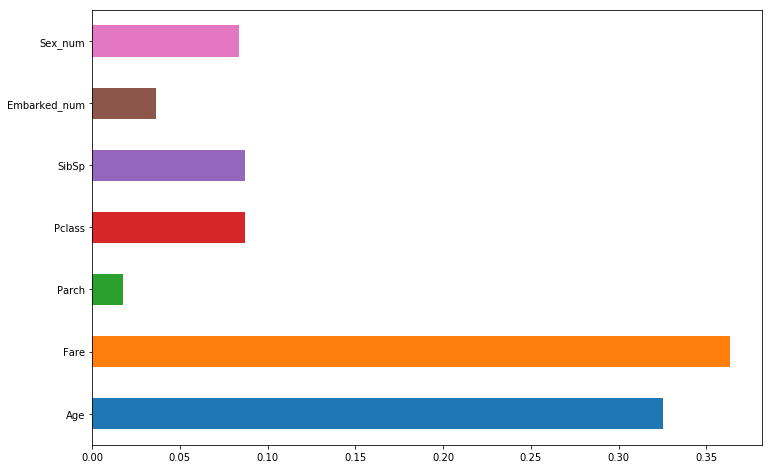

In [1283]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))
plt.show()


In [1286]:
y_pred = model.predict(test)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Name, Sex, Ticket, Cabin, Embarked

In [ ]:
np.isnan(IND).any()

In [ ]:
from sklearn.preprocessing import Imputer

In [ ]:
values = X.values
imputer = Imputer()
transformed_values = imputer.fit_transform(values)

In [ ]:
transformed_values